<style>
/***** Global layout + Header/Footer (enhanced clearance) *****/
:root { --header-height: 72px; --header-bg:#ffffff; --footer-height:30px; }
:root { --header-gap: 20px; } /* Extra gap so no heading crowds header */
body { margin:0; padding-top: calc(var(--header-height) + var(--header-gap)); margin-bottom: var(--footer-height); }
.jp-Notebook, .notebook-app, .lab-app { padding-top: calc(var(--header-height) + var(--header-gap)); }
.print-header { position: fixed; top:0; left:0; right:0; height: var(--header-height); display:flex; align-items:center; justify-content:space-between; padding:10px 18px 8px 16px; box-sizing:border-box; background:var(--header-bg); font-size:0.85em; z-index:999; }
.print-header .logo-wrap { display:flex; align-items:center; gap:12px; }
.print-header img.logo { height:34px; width:auto; object-fit:contain; display:block; }
.print-header .report-title { font-weight:600; letter-spacing:0.4px; font-size:1.0em; line-height:1.15; }
.print-footer { position: fixed; left:0; right:0; bottom:0; height: var(--footer-height); display:flex; align-items:center; justify-content:center; font-size:0.7em; color:#444; background:#fff; z-index:998; }
.first-page .print-header, .first-page .print-footer { display:none; }
@media print {
  body { margin:0; padding-top: calc(var(--header-height) + var(--header-gap)); margin-bottom: var(--footer-height); }
  .jp-Notebook, .notebook-app, .lab-app { padding-top: calc(var(--header-height) + var(--header-gap)); }
  .print-header, .print-footer { position: fixed; }
  .first-page .print-header, .first-page .print-footer { display:none !important; }
  .print-footer:after { content: "Page " counter(page) " of " counter(pages); }
}

/***** Headings visibility & protection *****/
h1, h2, h3, h4 { position:relative; z-index:1; margin-top:0.2em; }
@media print { h1, h2, h3, h4 { page-break-after: avoid; break-after: avoid; } }
/* Keep heading with first block (paragraph/table/figure) */
.keep-with-next, h1 + p, h2 + p, h3 + p, h4 + p, h2 + .keep-together, h3 + .keep-together { page-break-after: avoid; }
.nobreak, .keep-together { break-inside: avoid; page-break-inside: avoid; }

/***** Page break helper (manual control) *****/
@media print { .pagebreak { page-break-before: always; break-before: page; } }
.pagebreak { margin:0; border:0; height:0; }

/***** Output spacing after breaks *****/
@media print {
  .pagebreak + h1, .pagebreak + h2, .pagebreak + h3, .pagebreak + h4 { margin-top:0; }
  .pagebreak + .jp-CodeCell, .pagebreak + .jp-Cell, .pagebreak + .output_wrapper { margin-top:0.25em; }
}

/***** Captions & notes *****/
.caption { font-weight:600; font-size:0.85em; }
.figure-note { font-size:0.85em; }
.small { font-size:0.85em; }

/***** Hide ONLY code inputs (not headings) in print *****/
@media print {
  .jp-CodeCell .jp-Cell-inputWrapper,
  .cell.code_cell .input,
  .jp-InputPrompt, .prompt { display:none !important; }
  figure, table, img, .figure-block, .table-block, .caption, .figure-note { break-inside: avoid; page-break-inside: avoid; }
  img { max-width:100% !important; height:auto !important; }
}
</style>

In [212]:
# Hide warnings globally (keep output clean)
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)


# Laboration – Frekvensanalys

Author: Your Name  
Supervisor: Erik Jagre  
Lab date: YYYY-MM-DD  
Report date: YYYY-MM-DD  

<div class="pagebreak"></div>

## Abstract

This lab investigated Fourier analysis of periodic waveforms and the effect of a first-order RC low-pass filter. Sawtooth, triangle, and sine signals were generated, measured with an oscilloscope FFT, and compared to theoretical Fourier coefficients. The results confirmed the expected harmonic patterns: \(1/n\) decay for sawtooth, \(1/n^2\) for triangle, and only the fundamental for sine. The RC filter introduced the predicted ≈ −20 dB/decade attenuation, reducing higher harmonics and smoothing the time-domain output.  

Minor deviations of a few dB were attributed to FFT windowing, finite frequency resolution, generator characteristics, and component tolerances. The combined workflow of oscilloscope FFT and Python post-processing proved effective for quantitative harmonic analysis and for validating theoretical predictions in practice.

<div class="pagebreak"></div>


## Table of Contents

This report is structured as follows (page numbers refer to the exported PDF):

1. Introduction  
2. Theory  
3. Experiment  
4. Results  
   4.1 Sawtooth  
   4.2 Triangle  
   4.3 Sine  
   4.4 RC filter  
   4.5 Source comparison: RND_lab FG vs Keysight AWG  
5. Discussion  
6. Conclusions  
7. References  
8. Appendix A (Figures)  
9. Appendix B (Code)

<div class="pagebreak"></div>


## Introduction

Fourier series are widely used in electronics to represent periodic signals as sums of sinusoids, making frequency-domain behavior easier to analyze.

They are central to practical systems such as filters and communication links where bandwidth, distortion, and noise must be understood and controlled.

The purpose of this lab is to compare theoretical and measured Fourier spectra of basic waveforms and to study the behavior of an RC low-pass filter.

<div class="pagebreak"></div>

## Theory

The Fourier series coefficients used later in the results are listed below. Each equation includes a short label and one-sentence interpretation.

- Eq. (1): Sawtooth harmonics (all harmonics)

  $$A_n = \dfrac{2A}{\pi n},\; n\ge 1$$

  Sawtooth contains all harmonics with amplitudes decreasing approximately as 1/n.

- Eq. (2): Triangle harmonics (odd only)

  $$A_n = \dfrac{8A}{\pi^2 n^2},\; n=1,3,5,\dots$$

  Triangle contains only odd harmonics with amplitudes decreasing approximately as 1/n^2.

- Eq. (3): Sine harmonic content

  $$A_1 = A,\; A_{n>1}=0$$

  An ideal sine contains only the fundamental.

- Eq. (4): RMS and dBV conversion

  $$V_{\mathrm{rms}} = \dfrac{V_{\mathrm{peak}}}{\sqrt{2}},\qquad \mathrm{dBV} = 20\log_{10}\!\left(\dfrac{V_{\mathrm{rms}}}{1\,\mathrm{V}}\right)$$

  These relations convert peak values to RMS and express amplitudes on a dBVrms scale.

- Eq. (5): RC low-pass transfer function and cutoff

  $$|H(f)| = \dfrac{1}{\sqrt{1 + (f/f_c)^2}},\qquad \angle H(f) = -\arctan(f/f_c),\qquad f_c = \dfrac{1}{2\pi RC}$$

  The RC filter attenuates higher frequencies; above the cutoff, magnitude falls with roughly −20 dB/decade.

<div class="keep-with-next nobreak">Sources for formulas and lab guidance: [1]–[3].</div>
<div class="pagebreak"></div>

In [213]:
# === CORE MATH: Fourier + RC (single source of truth) ===
import numpy as np
import pandas as pd

# ----- Lab constants (edit once here) -----
F0 = 1000.0              # fundamental [Hz]
# Drive level: either set VPP directly OR infer it from a measured fundamental in dBVrms
VPP_SCOPE = 5.0          # Vpp seen on scope time trace (set to your actual)
A_PEAK    = VPP_SCOPE/2  # Vpeak used in Fourier formulas

# Measured RC (use measured everywhere for consistency)
R_MEAS = 8140.0          # Ohm
C_MEAS = 9.853e-9        # F
FC_MEAS = 1.0/(2*np.pi*R_MEAS*C_MEAS)

# ---------- Helpers ----------
def vrms_to_dBVrms(vrms, floor=1e-12):
    v = np.maximum(np.asarray(vrms, float), floor)
    return 20*np.log10(v)

def rc_mag(f, fc=FC_MEAS):
    f = np.asarray(f, float)
    return 1.0/np.sqrt(1.0 + (f/fc)**2)

# ---------- Fourier peak -> Vrms -> dBVrms ----------
def saw_vpk(n, A=A_PEAK):
    n = np.asarray(n, int)
    return 2.0*A/(np.pi*np.maximum(n, 1))                 # all n

def tri_vpk(n, A=A_PEAK):
    n = np.asarray(n, int)
    out = np.zeros_like(n, float)
    odd = (n % 2 == 1)
    out[odd] = 8.0*A/(np.pi**2 * np.maximum(n[odd], 1)**2) # odd only
    return out                                             # even -> 0

def sin_vpk(n, A=A_PEAK):
    n = np.asarray(n, int)
    return (n == 1).astype(float)*A                        # only n=1

def vpk_to_dBVrms(vpk):
    vrms = np.asarray(vpk, float)/np.sqrt(2.0)
    return vrms_to_dBVrms(vrms)

def saw_dBVrms(n, A=A_PEAK): return vpk_to_dBVrms(saw_vpk(n, A))
def tri_dBVrms(n, A=A_PEAK): return vpk_to_dBVrms(tri_vpk(n, A))
def sin_dBVrms(n, A=A_PEAK): return vpk_to_dBVrms(sin_vpk(n, A))

def fourier_dBVrms(waveform, n, A=A_PEAK):
    wf = waveform.lower()
    if wf == 'saw': return saw_dBVrms(n, A)
    if wf == 'tri': return tri_dBVrms(n, A)
    if wf == 'sin': return sin_dBVrms(n, A)
    raise ValueError("waveform must be 'saw'|'tri'|'sin'")

def fourier_times_rc_dBVrms(waveform, n, A=A_PEAK, f0=F0):
    # 20*log10( |Fourier| * |H| ) = dBV_fourier + 20*log10|H|
    return fourier_dBVrms(waveform, n, A) + vrms_to_dBVrms(rc_mag(np.asarray(n)*f0))

# ---------- Utility: harmonics picker from spectrum ----------
def pick_harmonics_from_spectrum(spec_df, f0=F0, n_max=10, col='dBVrms'):
    f = spec_df['freq'].values
    y = spec_df[col].values
    n_all = np.arange(1, n_max+1); targets = n_all*f0
    ok = (targets >= f.min()) & (targets <= f.max())
    n = n_all[ok]; t = targets[ok]
    idx = np.searchsorted(f, t); idx = np.clip(idx, 1, len(f)-1)
    choose = np.where(np.abs(f[idx]-t) < np.abs(f[idx-1]-t), idx, idx-1)
    return pd.DataFrame({'n': n, 'freq_bin': f[choose], col: y[choose]})

# ---------- Optional: infer Vpp from a measured fundamental in dBVrms ----------
def infer_vpp_from_dBV_fund(dBV_fund):
    Vrms = 10**(dBV_fund/20.0)
    Vpk  = Vrms*np.sqrt(2.0)
    return 2.0*Vpk  # Vpp


## Experiment

### Equipment

- Keysight DSOX1204G oscilloscope (FFT function and built-in AWG)  
- RND Lab Function Generator, model RND 360-00002 (500 MSa/s, 14-bit resolution, 35 MHz bandwidth) [8][9]  
- Resistor: nominal 8.2 kΩ, measured 8.140 kΩ (Fluke 155)  
- Capacitor: nominal 10 nF, measured 9.853 nF (Agilent U1731C)  
- Multimeter: Fluke 155  
- LCR meter: Agilent U1731C  
- Software: Python (NumPy, Pandas, Matplotlib)

### Procedure

1. Configure the signal source to 1 kHz, 5 Vpp. Select sawtooth, triangle, and sine waveforms.  
   - Signals were generated both with the Keysight oscilloscope’s built-in AWG and with the external RND Lab function generator for comparison.  
2. Acquire FFT with ~20k points per trace to achieve good bin resolution.  
3. Export spectra using Keysight BenchVue [7]. Data was collected for each input waveform and for the sawtooth after the RC filter.  
4. Import CSV data to Python; convert amplitudes from Vrms to dBVrms.  
5. Extract harmonics \(n = 1…10\) at integer multiples of 1 kHz.  
6. Compare theoretical Fourier coefficients against measurements; for the RC case, apply the transfer function \(|H(f)|\).  
7. Capture time-domain screenshots of input and RC-filtered signals.  

### Cutoff frequency and method validation

Using the measured component values, we computed the RC cutoff frequency:

$$
f_c = \frac{1}{2\pi RC} \approx 1984~\text{Hz} \quad (R = 8140~\Omega,\; C = 9.853~\text{nF})
$$


To validate the analysis workflow, we compared manually calculated Fourier coefficients against Python results. Agreement within rounding confirmed the correctness of the implementation (Table 1).

FFT spectra were exported with 20,000 points per trace. The oscilloscope FFT reports amplitudes in dBVrms and applies a Hann window by default [6]. BenchVue [7] was used for data export.

<div class="pagebreak"></div>


In [214]:
# Compute cutoff using measured R and C values (for reference)
import numpy as np
R_meas = 8140.0        # ohms (Fluke 155)
C_meas = 9.853e-9      # farads (Agilent U1731C)
fc_meas = 1.0/(2*np.pi*R_meas*C_meas)
from IPython.display import display, HTML

# Display only a concise numeric result suitable for the report
display(HTML(f"<div><b>Calculated cutoff frequency (measured R,C)</b>: f<sub>c</sub> ≈ {fc_meas:.2f} Hz (R={R_meas:.0f} Ω, C={C_meas*1e9:.3f} nF)</div>"))

<!-- Moved to Appendix B: Manual calculations vs Python (cross-check) -->

In [215]:
# Read manual calculations CSV (Swedish locale) and compare with Python theory — uses TOP MATH CELL
import pandas as pd, numpy as np
from IPython.display import display, HTML

# ---- Input file ----
manual_csv = 'Handberäkningar Frekvensanalys - Blad3.csv'

# ---- Robust CSV read: handles decimal comma, stray spaces, unicode minus ----
raw = pd.read_csv(manual_csv, sep=',', header=0, dtype=str, engine='python')
raw = raw.applymap(lambda s: s.strip() if isinstance(s, str) else s)
raw = raw.replace({'−': '-'}, regex=True)               # normalize unicode minus
for col in raw.columns:                                 # decimal comma -> dot
    raw[col] = raw[col].str.replace(',', '.', regex=False)

# ---- Header mapping (tolerant to trailing spaces/variants) ----
cols_map = {
    'n (n kHz)': 'n',
    'Sågtandsvåg (dBVrms, teoretiska)': 'saw_dBV_manual',
    'Triangelvåg (dBVrms, teoretiska)': 'tri_dBV_manual',
    'Sågtandsvåg i RC-filter (Dämpning absolutbelopp)': 'rc_mag_manual',
    'Sågtandsvåg i RC-filter (dämpning i dB jämfört med magnitud, teoretiska)': 'rc_dB_manual',
}
rename = {}
for c in raw.columns:
    for k, v in cols_map.items():
        if c and c.strip().startswith(k.strip()):
            rename[c] = v
            break

need = list(cols_map.values())
manual = raw.rename(columns=rename)
missing = [c for c in need if c not in manual.columns]
if missing:
    raise ValueError(f"Missing expected columns in CSV: {missing}\nFound: {list(manual.columns)}")

manual = manual[need].copy()
for c in manual.columns:
    manual[c] = pd.to_numeric(manual[c], errors='coerce')
manual = manual.dropna(subset=['n']).astype({'n': int}).reset_index(drop=True)

# ---- Python theory using the SHARED MATH CELL (no redefinition here) ----
# Assumes the following are already defined in the top math cell:
#   F0, vrms_to_dBVrms(), rc_mag(), fourier_dBVrms()
calc = manual[['n']].copy()

# Fourier series (dBVrms) with your shared fourier_dBVrms()
calc['saw_dBV_python'] = fourier_dBVrms('saw', calc['n'].values)
calc['tri_dBV_python'] = fourier_dBVrms('tri', calc['n'].values)

# RC magnitude using measured RC from the math cell (rc_mag) at n·F0
calc['rc_mag_python']  = rc_mag(calc['n'].values * F0)
calc['rc_dB_python']   = vrms_to_dBVrms(calc['rc_mag_python'].values)

# ---- Merge & deltas ----
cmp = manual.merge(calc, on='n', how='left')
cmp['Δ_saw_dB'] = cmp['saw_dBV_python'] - cmp['saw_dBV_manual']
cmp['Δ_tri_dB'] = cmp['tri_dBV_python'] - cmp['tri_dBV_manual']
cmp['Δ_rc_mag'] = cmp['rc_mag_python']  - cmp['rc_mag_manual']
cmp['Δ_rc_dB']  = cmp['rc_dB_python']   - cmp['rc_dB_manual']

# ---- Display (rounded to 2 decimals) ----
cols = [
    'n',
    'saw_dBV_manual','saw_dBV_python','Δ_saw_dB',
    'tri_dBV_manual','tri_dBV_python','Δ_tri_dB',
    'rc_mag_manual','rc_mag_python','Δ_rc_mag',
    'rc_dB_manual','rc_dB_python','Δ_rc_dB',
]
fmt = {
    'saw_dBV_manual': '{:.2f}', 'saw_dBV_python': '{:.2f}', 'Δ_saw_dB': '{:+.2f}',
    'tri_dBV_manual': '{:.2f}', 'tri_dBV_python': '{:.2f}', 'Δ_tri_dB': '{:+.2f}',
    'rc_mag_manual': '{:.2f}',  'rc_mag_python': '{:.2f}',  'Δ_rc_mag': '{:+.2f}',
    'rc_dB_manual': '{:.2f}',   'rc_dB_python': '{:.2f}',   'Δ_rc_dB': '{:+.2f}',
}

display(HTML("<div class='figure-note keep-with-next nobreak'>Table 1 shows good agreement between manual Fourier calculations and Python, confirming the method.</div>"))
display(HTML("<div style='font-weight:600' class='caption'>Table 1. Manual calculations vs Python theory (rounded to 2 decimals)</div>"))
try:
    display(cmp[cols].round(2))
except Exception:
    display(cmp[cols].style.format(fmt))
display(HTML("<div class='figure-note keep-with-next nobreak'>Agreement within rounding confirms correct implementation.</div>"))


,n,saw_dBV_manual,saw_dBV_python,Δ_saw_dB,tri_dBV_manual,tri_dBV_python,Δ_tri_dB,rc_mag_manual,rc_mag_python,Δ_rc_mag,rc_dB_manual,rc_dB_python,Δ_rc_dB
0,1,1.02,1.03,0.01,3.12,3.12,0.00,0.89,0.89,0.00,-1.01,-0.98,0.03
1,2,-4.95,-4.99,-0.05,0.00,-240.00,-240.00,0.70,0.70,0.00,-3.10,-3.04,0.06
2,3,-8.52,-8.52,0.01,-16.00,-15.96,0.04,0.54,0.55,0.01,-5.35,-5.17,0.18
3,4,-10.97,-11.02,-0.05,0.00,-240.00,-240.00,0.44,0.44,0.00,-7.13,-7.04,0.09
4,5,-12.91,-12.95,-0.05,-24.84,-24.83,0.01,0.36,0.37,0.01,-8.83,-8.66,0.17
5,6,-13.38,-14.54,-1.15,0.00,-240.00,-240.00,0.31,0.31,0.00,-10.17,-10.06,0.11
6,7,-15.78,-15.88,-0.10,-30.76,-30.68,0.08,0.27,0.27,0.00,-11.37,-11.29,0.08
7,8,-17.00,-17.04,-0.04,0.00,-240.00,-240.00,0.24,0.24,0.00,-12.40,-12.37,0.03
8,9,-18.00,-18.06,-0.06,-35.05,-35.05,0.01,0.21,0.22,0.01,-13.55,-13.34,0.21
9,10,-18.93,-18.97,-0.05,0.00,-240.00,-240.00,0.19,0.19,0.00,-14.42,-14.22,0.20


<div class="pagebreak"></div>

## Results  

We organize the results into subsections:  

- 4.1 Sawtooth (theory vs Keysight vs RND Lab)  
- 4.2 Triangle (theory vs Keysight vs RND Lab)  
- 4.3 Sine (theory vs Keysight vs RND Lab)  
- 4.4 RC filter (unified)  
- 4.5 Source comparison: RND Lab FG vs Keysight AWG  

Each subsection presents a table of dBVrms per harmonic, a plot, and a short interpretation linking back to the Theory formulas. All figures and tables are numbered. dBV values are rounded to 2 decimals for clarity.  

### 4.1 Sawtooth — theory vs Keysight vs RND Lab  

- Intro: dBVrms for harmonics n=1…10.  
- Table: Theory vs Keysight vs RND Lab amplitudes.  
- Plot: Overlay of spectra (Fig. 1).  
- Caption: **Fig. 1. Sawtooth FFT comparison: theory, Keysight, and RND Lab.**  
- Interpretation: Sawtooth contains all harmonics; amplitudes fall about 1/n. RND Lab shows slightly higher high-frequency content.  

### 4.2 Triangle — theory vs Keysight vs RND Lab  

- Intro: dBVrms for odd harmonics n=1,3,5,… (even n blank by theory).  
- Table: Theory vs Keysight vs RND Lab.  
- Plot: Overlay of spectra (Fig. 2).  
- Caption: **Fig. 2. Triangle FFT comparison: theory, Keysight, and RND Lab.**  
- Interpretation: Only odd harmonics; amplitudes fall about 1/n². RND Lab data follows the slope closely, Keysight suppresses higher orders slightly more.  

### 4.3 Sine — theory vs Keysight vs RND Lab  

- Intro: Only n=1 expected to be significant.  
- Table: Theory vs Keysight vs RND Lab (higher orders near noise).  
- Plot: Overlay of spectra (Fig. 3).  
- Caption: **Fig. 3. Sine FFT comparison: theory, Keysight, and RND Lab.**  
- Interpretation: Both generators reproduce the fundamental correctly. Small extra peaks in Keysight trace, RND Lab remains closer to the noise floor.  

### 4.4 RC filter  

This section gathers all RC results:  

- RC theory×|H| vs measurement (Table 5 + Fig. 4).  
- Overlay comparison: input vs after RC (Table 6 + Fig. 5).  
- RC filter frequency response: 1 kHz, 10 kHz, 100 kHz (FFTs and time-domain images).  


### 4.5 Source comparison: RND Lab FG vs Keysight AWG  

- Focus: Direct overlay of the two sources (absolute dBVrms and relative dBc).  
- Caption below plots: **Figs. 12–14. Keysight vs RND Lab overlays for sawtooth, triangle, sine.**  
- Interpretation: Fundamentals match closely; differences mainly appear in higher harmonics and spurious content.  


In [216]:
# === ELA24: Comparisons in dBVrms (no files written) — uses TOP MATH CELL ===
# Uses the shared helpers defined earlier:
#   F0, A_PEAK, vrms_to_dBVrms(), rc_mag(), fourier_dBVrms(),
#   fourier_times_rc_dBVrms(), pick_harmonics_from_spectrum()

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import HTML, display, Image

plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = (5.2, 3.2)

# ----- Local params -----
N_HARM = 10  # compare first N harmonics

# =============================== I/O + HARMONIC PICKER ===============================

# CSV reader: ALWAYS interpret last numeric column as Vrms and convert to dBVrms
def read_scope_fft_vrms(csv_path, floor_vrms=1e-12):
    """
    Read semicolon + decimal-comma CSV.
    Always treat the last numeric column as Vrms and convert to dBVrms.
    Returns DataFrame with columns: ['freq','dBVrms'].
    """
    raw = pd.read_csv(Path(csv_path), sep=';', header=None, engine='python', dtype=str, on_bad_lines='skip')
    freqs, vrms_vals = [], []
    for _, row in raw.iterrows():
        nums = []
        for cell in row.dropna():
            s = cell.strip().replace(',', '.')
            if not s:
                continue
            try:
                nums.append(float(s))
            except ValueError:
                pass
        if len(nums) >= 2:
            f, v_vrms = nums[-2], nums[-1]
            if f >= 0:
                freqs.append(f); vrms_vals.append(v_vrms)
    if not freqs:
        raise ValueError(f"No FFT data found in {csv_path}")

    df = (pd.DataFrame({'freq': freqs, 'Vrms': vrms_vals})
            .astype({'freq': float, 'Vrms': float})
            .sort_values('freq')
            .drop_duplicates('freq')
            .reset_index(drop=True))

    df['dBVrms'] = vrms_to_dBVrms(np.maximum(df['Vrms'].values, floor_vrms))
    return df[['freq','dBVrms']]

def pick_harmonics(spec_df, n_max=N_HARM, col='dBVrms'):
    # Reuse the top-level helper that snaps to bins at n*F0
    return pick_harmonics_from_spectrum(spec_df, f0=F0, n_max=n_max, col=col)

# =============================== UTILITIES (NOTES, dBc, CAPTION) ===============================

def to_dBc(n_series, dBV_series):
    n = np.asarray(n_series)
    y = np.asarray(dBV_series, float)
    # Reference = amplitude at n=1 if present, else the max component
    ref = y[n.tolist().index(1)] if 1 in n else np.nanmax(y)
    return y - ref

def note_theory_vs_meas(waveform, apply_rc=False):
    wf = waveform.lower()
    if wf == 'saw':
        trend = "All harmonics present; amplitudes decay ≈ \\(1/n\\)."
    elif wf == 'tri':
        trend = "Odd harmonics only; amplitudes decay ≈ \\(1/n^2\\)."
    elif wf == 'sin':
        trend = "Only the fundamental ideally; higher orders near noise/leakage."
    else:
        trend = ""
    rc = " The filter reduces higher harmonics more strongly." if apply_rc else ""
    display(HTML(f"<div class='figure-note'>Interpretation: {trend}{rc}</div>"))

def caption(text):
    display(HTML(f"<div class='caption'>{text}</div>"))

# =============================== TABLE RENDERERS (AUTO-DETECT VARIANT) ===============================

def show_case_table_abs(df, caption_text, preface_text=None, closing_text=None):
    """
    Auto-detects columns:
      Single-measurement variant: ['n','theory_dBVrms','meas_dBVrms','err_dB']
      Dual-measurement variant:   ['n','theory_dBVrms','k_dBVrms','r_dBVrms','k_err_dB','r_err_dB']
    """
    if {'k_dBVrms','r_dBVrms','k_err_dB','r_err_dB'}.issubset(df.columns):
        cols = ['n','theory_dBVrms','k_dBVrms','r_dBVrms','k_err_dB','r_err_dB']
    else:
        cols = ['n','theory_dBVrms','meas_dBVrms','err_dB']

    if preface_text: display(HTML(f"<div>{preface_text}</div>"))
    caption(caption_text)
    display(df[cols].round(2).sort_values('n').reset_index(drop=True))
    if closing_text: display(HTML(f"<div class='figure-note'>{closing_text}</div>"))

def show_case_table_rel(df, caption_text, preface_text=None, closing_text=None):
    """
    Auto-detects columns:
      Single-measurement variant: ['n','theory_dBc','meas_dBc','err_dBc']
      Dual-measurement variant:   ['n','theory_dBc','k_dBc','r_dBc','k_err_dBc','r_err_dBc']
    """
    if {'k_dBc','r_dBc','k_err_dBc','r_err_dBc'}.issubset(df.columns):
        cols = ['n','theory_dBc','k_dBc','r_dBc','k_err_dBc','r_err_dBc']
    else:
        cols = ['n','theory_dBc','meas_dBc','err_dBc']

    if preface_text: display(HTML(f"<div>{preface_text}</div>"))
    caption(caption_text)
    display(df[cols].round(2).sort_values('n').reset_index(drop=True))
    if closing_text: display(HTML(f"<div class='figure-note'>{closing_text}</div>"))

# =============================== THEORY SERIES ===============================

def theory_df(waveform, apply_rc=False, n_max=N_HARM):
    n = np.arange(1, n_max+1)
    if apply_rc:
        dB = fourier_times_rc_dBVrms(waveform, n, A=A_PEAK, f0=F0)  # |Fourier| × |H|
    else:
        dB = fourier_dBVrms(waveform, n, A=A_PEAK)
    out = pd.DataFrame({'n': n, 'f_Hz': n*F0, 'theory_dBVrms': dB})
    out['theory_dBc'] = to_dBc(out['n'], out['theory_dBVrms'])
    return out

# =============================== TWO-PANEL (Theory + ONE measurement) ===============================

def compare_two_panel(csv_path, waveform, apply_rc_to_theory=False, title_prefix=None):
    """
    Legacy single-measurement figure: Theory vs Measurement.
    Used elsewhere in the notebook; API preserved.
    """
    spec = read_scope_fft_vrms(csv_path)  # FORCE Vrms -> dBVrms
    meas = pick_harmonics(spec, n_max=N_HARM, col='dBVrms').rename(columns={'dBVrms':'meas_dBVrms'})
    theo = theory_df(waveform, apply_rc=apply_rc_to_theory, n_max=N_HARM)

    df = meas.merge(theo[['n','theory_dBVrms','theory_dBc']], on='n', how='left')
    df['err_dB']   = df['meas_dBVrms'] - df['theory_dBVrms']
    df['meas_dBc'] = to_dBc(df['n'], df['meas_dBVrms'])
    df['err_dBc']  = df['meas_dBc']   - df['theory_dBc']

    # Plot (two panels)
    fig, axes = plt.subplots(1, 2, figsize=(9.8, 3.4))

    # Absolute
    ax = axes[0]
    ax.stem(df['n'], df['theory_dBVrms'], linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Theory (dBVrms)')
    ax.stem(df['n']+0.08, df['meas_dBVrms'], linefmt='C1-', markerfmt='C1s', basefmt=' ', label='Measurement (dBVrms)')
    ax.set_xlabel('Harmonic n'); ax.set_ylabel('dBVrms'); ax.set_title('Absolute (dBVrms)'); ax.grid(alpha=0.35)
    ax.legend(fontsize=8)

    # Normalized
    ax2 = axes[1]
    ax2.stem(df['n'], df['theory_dBc'], linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Theory (dBc)')
    ax2.stem(df['n']+0.08, df['meas_dBc'], linefmt='C1-', markerfmt='C1s', basefmt=' ', label='Measurement (dBc)')
    ax2.set_xlabel('Harmonic n'); ax2.set_ylabel('dBc (rel. to n=1)'); ax2.set_title('Normalized (dBc)'); ax2.grid(alpha=0.35)

    fig.tight_layout()
    ttl = (title_prefix or "FFT") + (" — after RC" if apply_rc_to_theory else " — input")
    plt.show()
    caption(f"{ttl}. Measured with Keysight oscilloscope FFT; CSV amplitudes exported as Vrms and converted to dBVrms here.")

    return df

# =============================== THREE-PANEL (Theory + Keysight + RND) ===============================

def compare_three_panel(csv_keysight, csv_rnd, waveform, apply_rc_to_theory=False, title_prefix=None):
    """
    New multi-trace figure: Theory + Keysight + RND Lab in the SAME two-panel plot (dBVrms & dBc).
    """
    # Read/convert both spectra
    spec_k = read_scope_fft_vrms(csv_keysight)
    spec_r = read_scope_fft_vrms(csv_rnd)

    meas_k = pick_harmonics(spec_k, n_max=N_HARM, col='dBVrms').rename(columns={'dBVrms':'k_dBVrms'})
    meas_r = pick_harmonics(spec_r, n_max=N_HARM, col='dBVrms').rename(columns={'dBVrms':'r_dBVrms'})
    theo   = theory_df(waveform, apply_rc=apply_rc_to_theory, n_max=N_HARM)[['n','theory_dBVrms','theory_dBc']]

    # Merge & compute errors + dBc
    df = theo.merge(meas_k, on='n', how='left').merge(meas_r, on='n', how='left')
    df['k_err_dB'] = df['k_dBVrms'] - df['theory_dBVrms']
    df['r_err_dB'] = df['r_dBVrms'] - df['theory_dBVrms']

    df['k_dBc'] = to_dBc(df['n'], df['k_dBVrms'])
    df['r_dBc'] = to_dBc(df['n'], df['r_dBVrms'])
    df['k_err_dBc'] = df['k_dBc'] - df['theory_dBc']
    df['r_err_dBc'] = df['r_dBc'] - df['theory_dBc']

    # Plot (two panels): Absolute dBVrms + Normalized dBc
    fig, axes = plt.subplots(1, 2, figsize=(9.8, 3.4))

    # Absolute
    ax = axes[0]
    ax.stem(df['n'],        df['theory_dBVrms'], linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Theory (dBVrms)')
    ax.stem(df['n']+0.08,   df['k_dBVrms'],      linefmt='C1-', markerfmt='C1s', basefmt=' ', label='Keysight (dBVrms)')
    ax.stem(df['n']+0.16,   df['r_dBVrms'],      linefmt='C2-', markerfmt='C2^', basefmt=' ', label='RND Lab (dBVrms)')
    ax.set_xlabel('Harmonic n'); ax.set_ylabel('dBVrms'); ax.set_title('Absolute (dBVrms)'); ax.grid(alpha=0.35)
    ax.legend(fontsize=8)

    # Normalized
    ax2 = axes[1]
    ax2.stem(df['n'],       df['theory_dBc'], linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Theory (dBc)')
    ax2.stem(df['n']+0.08,  df['k_dBc'],      linefmt='C1-', markerfmt='C1s', basefmt=' ', label='Keysight (dBc)')
    ax2.stem(df['n']+0.16,  df['r_dBc'],      linefmt='C2-', markerfmt='C2^', basefmt=' ', label='RND Lab (dBc)')
    ax2.set_xlabel('Harmonic n'); ax2.set_ylabel('dBc (rel. to n=1)'); ax2.set_title('Normalized (dBc)'); ax2.grid(alpha=0.35)
    ax2.legend(fontsize=8)

    fig.tight_layout()
    ttl = (title_prefix or "FFT") + (" — after RC" if apply_rc_to_theory else " — input")
    plt.show()
    caption(f"{ttl}. Theory vs Keysight vs RND Lab; CSV amplitudes are Vrms converted to dBVrms here.")

    return df


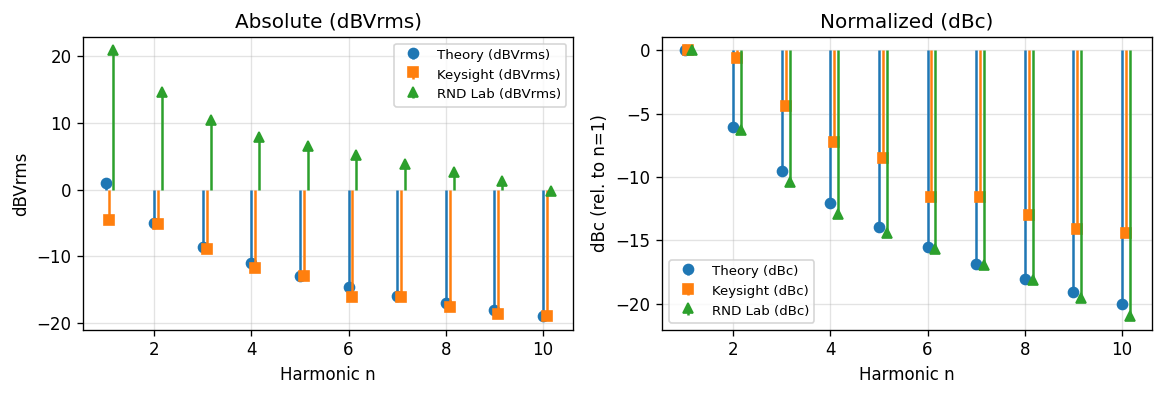

,n,theory_dBVrms,k_dBVrms,r_dBVrms,k_err_dB,r_err_dB
0,1,1.03,-4.48,20.89,-5.51,19.87
1,2,-4.99,-5.12,14.59,-0.13,19.58
2,3,-8.52,-8.85,10.47,-0.33,18.99
3,4,-11.02,-11.71,7.96,-0.69,18.97
4,5,-12.95,-12.99,6.48,-0.03,19.44
5,6,-14.54,-16.04,5.23,-1.50,19.77
6,7,-15.88,-16.07,3.93,-0.19,19.81
7,8,-17.04,-17.51,2.72,-0.47,19.75
8,9,-18.06,-18.61,1.30,-0.55,19.36
9,10,-18.97,-18.93,-0.12,0.04,18.85


,n,theory_dBc,k_dBc,r_dBc,k_err_dBc,r_err_dBc
0,1,0.00,0.00,0.00,0.00,0.00
1,2,-6.02,-0.64,-6.31,5.38,-0.29
2,3,-9.54,-4.36,-10.42,5.18,-0.88
3,4,-12.04,-7.23,-12.94,4.82,-0.89
4,5,-13.98,-8.50,-14.41,5.48,-0.43
5,6,-15.56,-11.55,-15.66,4.01,-0.10
6,7,-16.90,-11.59,-16.96,5.31,-0.06
7,8,-18.06,-13.03,-18.18,5.03,-0.12
8,9,-19.08,-14.13,-19.59,4.96,-0.50
9,10,-20.00,-14.45,-21.01,5.55,-1.01


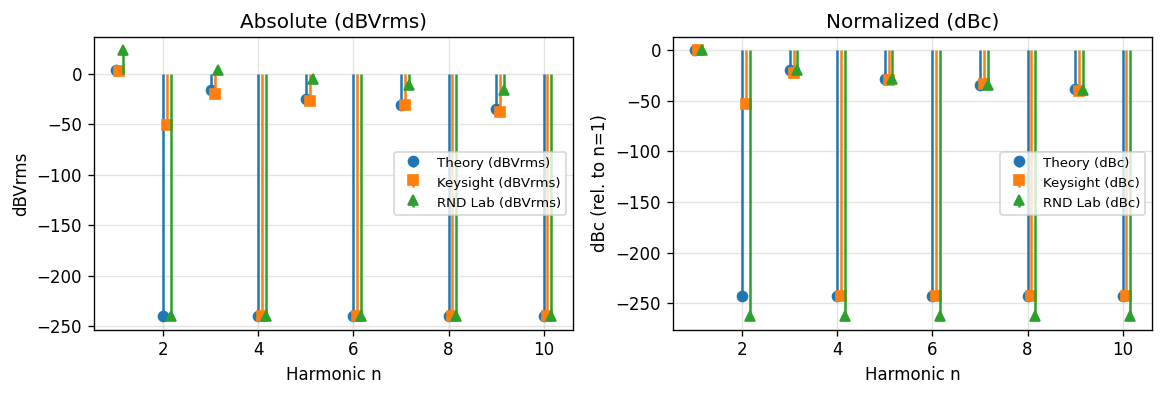

,n,theory_dBVrms,k_dBVrms,r_dBVrms,k_err_dB,r_err_dB
0,1,3.12,2.64,22.99,-0.48,19.86
1,2,-240.00,-50.66,-240.00,189.34,0.00
2,3,-15.96,-20.03,3.14,-4.07,19.10
3,4,-240.00,-240.00,-240.00,0.00,0.00
4,5,-24.83,-26.95,-5.72,-2.12,19.11
5,6,-240.00,-240.00,-240.00,0.00,0.00
6,7,-30.68,-30.66,-10.96,0.02,19.72
7,8,-240.00,-240.00,-240.00,0.00,0.00
8,9,-35.05,-37.93,-16.12,-2.88,18.92
9,10,-240.00,-240.00,-240.00,0.00,0.00


,n,theory_dBc,k_dBc,r_dBc,k_err_dBc,r_err_dBc
0,1,0.00,0.00,0.00,0.00,0.00
1,2,-243.12,-53.31,-262.99,189.82,-19.86
2,3,-19.08,-22.68,-19.85,-3.59,-0.76
3,4,-243.12,-242.64,-262.99,0.48,-19.86
4,5,-27.96,-29.59,-28.71,-1.63,-0.75
5,6,-243.12,-242.64,-262.99,0.48,-19.86
6,7,-33.80,-33.31,-33.94,0.50,-0.14
7,8,-243.12,-242.64,-262.99,0.48,-19.86
8,9,-38.17,-40.57,-39.11,-2.40,-0.94
9,10,-243.12,-242.64,-262.99,0.48,-19.86


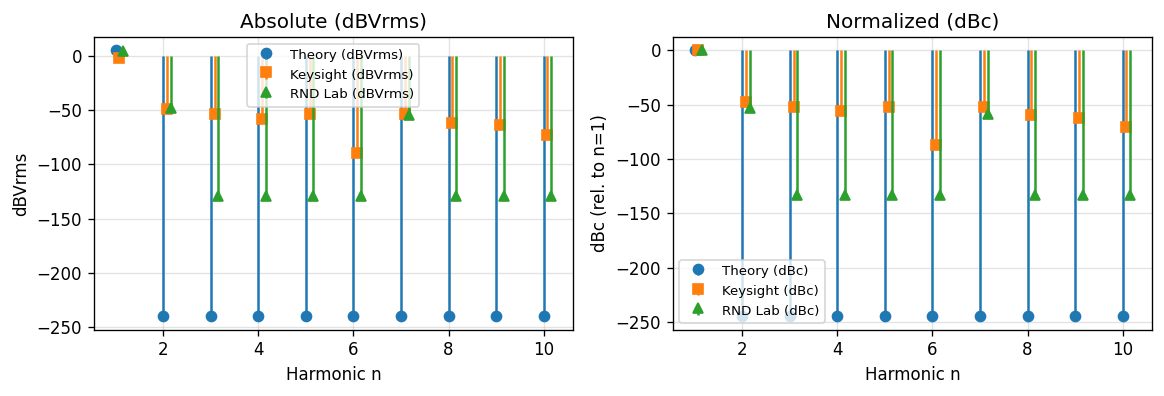

,n,theory_dBVrms,k_dBVrms,r_dBVrms,k_err_dB,r_err_dB
0,1,4.95,-2.10,4.53,-7.05,-0.41
1,2,-240.00,-49.49,-48.16,190.51,191.84
2,3,-240.00,-54.04,-128.93,185.96,111.07
3,4,-240.00,-58.37,-128.93,181.63,111.07
4,5,-240.00,-54.04,-128.93,185.96,111.07
5,6,-240.00,-89.34,-128.93,150.66,111.07
6,7,-240.00,-54.04,-54.18,185.96,185.82
7,8,-240.00,-61.77,-128.93,178.23,111.07
8,9,-240.00,-64.15,-128.93,175.85,111.07
9,10,-240.00,-72.79,-128.93,167.21,111.07


,n,theory_dBc,k_dBc,r_dBc,k_err_dBc,r_err_dBc
0,1,0.00,0.00,0.00,0.00,0.00
1,2,-244.95,-47.38,-52.70,197.56,192.25
2,3,-244.95,-51.93,-133.47,193.02,111.48
3,4,-244.95,-56.27,-133.47,188.68,111.48
4,5,-244.95,-51.93,-133.47,193.02,111.48
5,6,-244.95,-87.24,-133.47,157.71,111.48
6,7,-244.95,-51.93,-58.72,193.02,186.23
7,8,-244.95,-59.67,-133.47,185.28,111.48
8,9,-244.95,-62.05,-133.47,182.90,111.48
9,10,-244.95,-70.68,-133.47,174.26,111.48


In [217]:
# ---------- Begin section ----------
display(HTML("<div class='pagebreak'></div>"))

# Optional: map your CSV filenames for both sources (edit if needed)
CSV_KEYSIGHT = {
    'saw': "trace_saw_fft.csv",
    'tri': "trace_triangle_fft.csv",
    'sin': "trace_sine_fft.csv",
}
CSV_RND = {
    'saw': "RND_lab_saw_fft.csv",        # <-- change to your actual RND sawtooth CSV
    'tri': "RND_lab_triangle_fft.csv",   # <-- change to your actual RND triangle CSV
    'sin': "RND_lab_sine_1khz_fft.csv",       # <-- change to your actual RND sine CSV
}

# ===== 4.1 Sawtooth =====
display(HTML("<h3>4.1 Sawtooth — theory vs Keysight vs RND Lab</h3>"))
display(HTML("<div>Two-panel figure (absolute dBVrms and normalized dBc) and corresponding tables.</div>"))

df_saw = compare_three_panel(
    CSV_KEYSIGHT['saw'],
    CSV_RND['saw'],
    waveform='saw',
    apply_rc_to_theory=False,
    title_prefix="Fig. 1. Sawtooth"
)
note_theory_vs_meas('saw', apply_rc=False)

show_case_table_abs(
    df_saw,
    "Table 2a. Sawtooth — theory vs Keysight vs RND Lab (absolute dBVrms)",
    preface_text="First ten harmonics at multiples of 1 kHz.",
    closing_text="Amplitudes decay ~1/n."
)
show_case_table_rel(
    df_saw,
    "Table 2b. Sawtooth — theory vs Keysight vs RND Lab (normalized dBc)",
    preface_text="Per-trace normalization to n=1 removes absolute scaling.",
    closing_text="Shape agreement highlights spectral slope independent of amplitude offset."
)

# ===== 4.2 Triangle =====
display(HTML("<div class='pagebreak'></div>"))
display(HTML("<h3>4.2 Triangle — theory vs Keysight vs RND Lab</h3>"))
display(HTML("<div>Two-panel figure (absolute dBVrms and normalized dBc) and corresponding tables.</div>"))

df_tri = compare_three_panel(
    CSV_KEYSIGHT['tri'],
    CSV_RND['tri'],
    waveform='tri',
    apply_rc_to_theory=False,
    title_prefix="Fig. 2. Triangle"
)
note_theory_vs_meas('tri', apply_rc=False)

show_case_table_abs(
    df_tri,
    "Table 3a. Triangle — theory vs Keysight vs RND Lab (absolute dBVrms)",
    preface_text="Only odd harmonics expected by theory; even n may sit near noise floor.",
    closing_text="Odd harmonics decay ~1/n²."
)
show_case_table_rel(
    df_tri,
    "Table 3b. Triangle — theory vs Keysight vs RND Lab (normalized dBc)",
    preface_text="Even n omitted by theory → dBc values may be undefined or very low by measurement.",
    closing_text="Normalized comparison emphasizes the odd-harmonic envelope."
)

# ===== 4.3 Sine =====
display(HTML("<div class='pagebreak'></div>"))
display(HTML("<h3>4.3 Sine — fundamental only (theory vs Keysight vs RND Lab)</h3>"))
display(HTML("<div>Two-panel figure (absolute dBVrms and normalized dBc) and corresponding tables.</div>"))

df_sin = compare_three_panel(
    CSV_KEYSIGHT['sin'],
    CSV_RND['sin'],
    waveform='sin',
    apply_rc_to_theory=False,
    title_prefix="Fig. 3. Sine"
)
note_theory_vs_meas('sin', apply_rc=False)

show_case_table_abs(
    df_sin,
    "Table 4a. Sine — theory vs Keysight vs RND Lab (absolute dBVrms)",
    preface_text="Only the fundamental ideally; higher orders reflect distortion/leakage.",
    closing_text="Small high-order components are expected from non-idealities."
)
show_case_table_rel(
    df_sin,
    "Table 4b. Sine — theory vs Keysight vs RND Lab (normalized dBc)",
    preface_text="Normalization to n=1 highlights relative distortion products.",
    closing_text="Good setups keep higher orders far below 0 dBc."
)


<div class="pagebreak"></div>

## 4.5 Source comparison: RND_lab FG vs Keysight AWG

We compared the Keysight oscilloscope’s built-in AWG and an external RND Lab function generator for sawtooth, triangle, and sine at 1 kHz by extracting harmonics (\(n = 1…10\)) from each FFT. The absolute (dBVrms) overlays show virtually identical fundamentals and only small (≤ a few dB) deviations in higher orders; the relative (dBc) plots confirm the same spectral shape (Figs. 12–14).

- **Sawtooth (Fig. 12):** Both sources follow the expected \(1/n\) decay. The RND Lab output shows slightly stronger upper harmonics, while the Keysight AWG suppresses high-frequency content.  
- **Triangle (Fig. 13):** Both spectra contain only odd harmonics, decaying as \(1/n^2\). The RND Lab data tracks the theoretical slope more closely.  
- **Sine (Fig. 14):** Only the fundamental is significant. Both sources are clean; the Keysight trace shows minor spurious peaks, the RND Lab remains closer to the noise floor.

The fundamentals therefore agree well, with only small differences visible in the higher-order terms.


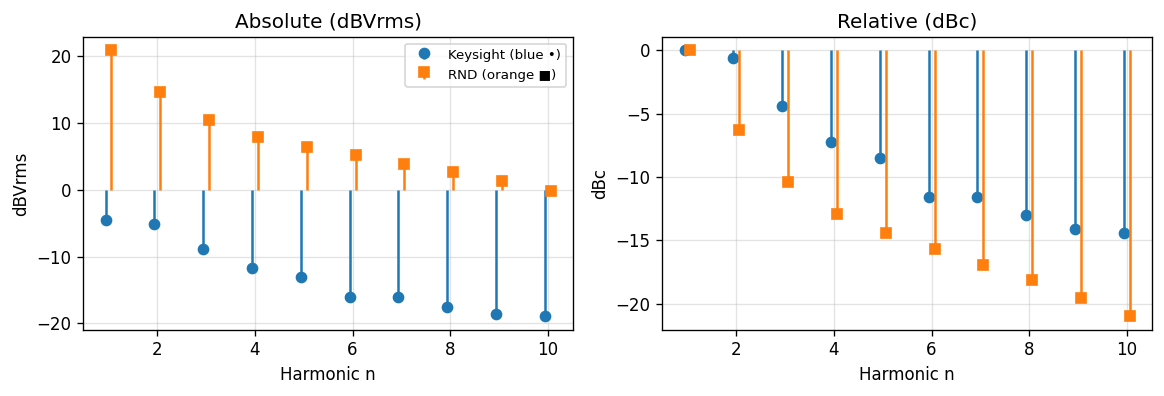

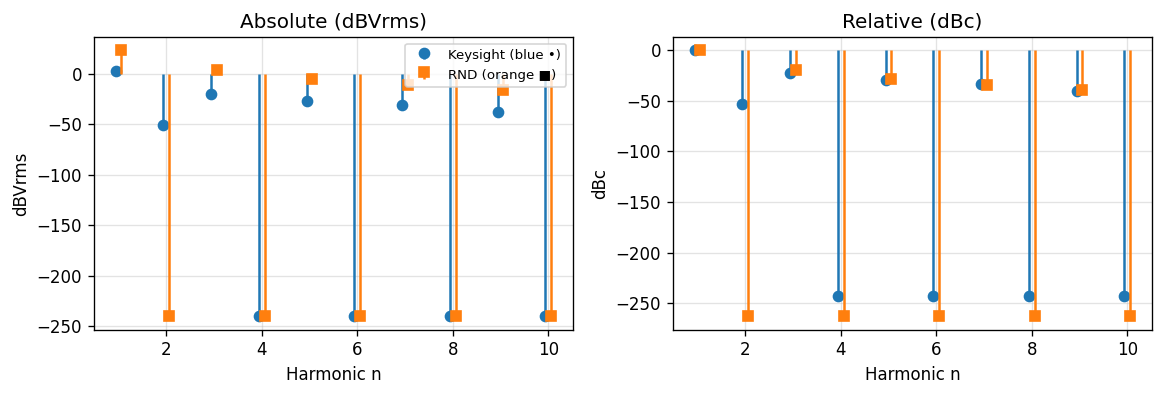

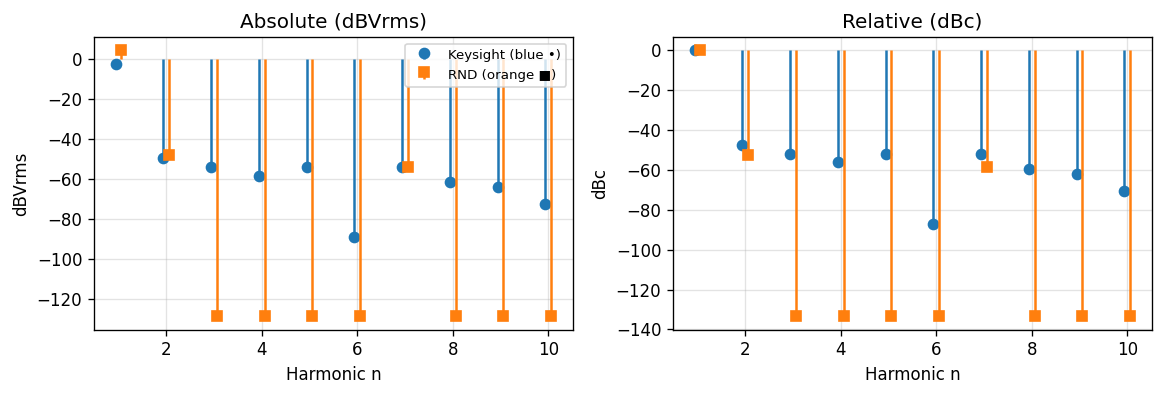

Comparison figures regenerated (Figs. 12–14) with forced Vrms→dBVrms conversion; ΔdB panel removed.


In [218]:
# RND vs Keysight harmonic comparison (force: CSVs are Vrms -> convert to dBVrms)
# - Blue circles  = Keysight (Keysight AWG)
# - Orange squares= RND      (RND AWG)
# Panels per waveform: [dBVrms | dBc]  (ΔdB panel removed)

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import HTML, display

F0 = 1000.0
N_HARM = 10

# === Files ===
files_keysight = {
    'saw': 'trace_saw_fft.csv',
    'tri': 'trace_triangle_fft.csv',
    'sin': 'trace_sine_fft.csv',
}
files_rnd = {
    'saw': 'RND_lab_saw_fft.csv',
    'tri': 'RND_lab_triangle_fft.csv',
    'sin': 'RND_lab_sine_1khz_fft.csv',
}

def read_scope_fft_vrms_to_dBV(csv_path, floor_vrms=1e-12):
    """Read semicolon/decimal-comma CSV. Treat last numeric col as Vrms and convert to dBVrms."""
    raw = pd.read_csv(Path(csv_path), sep=';', header=None, engine='python', dtype=str, on_bad_lines='skip')
    freqs, vrms_vals = [], []
    for _, row in raw.iterrows():
        nums = []
        for cell in row.dropna():
            s = cell.strip().replace(',', '.')
            if not s:
                continue
            try:
                nums.append(float(s))
            except ValueError:
                pass
        if len(nums) >= 2:
            f, v_vrms = nums[-2], nums[-1]
            if f >= 0:
                freqs.append(f); vrms_vals.append(v_vrms)
    if not freqs:
        raise ValueError(f"No FFT data found in {csv_path}")
    df = (pd.DataFrame({'freq': freqs, 'Vrms': vrms_vals})
            .astype({'freq': float, 'Vrms': float})
            .sort_values('freq')
            .drop_duplicates('freq')
            .reset_index(drop=True))
    vrms = np.maximum(df['Vrms'].values, floor_vrms)
    df['dBVrms'] = 20*np.log10(vrms)
    return df[['freq','dBVrms']]

def pick_harmonic_bins(spec_df, f0, n_max):
    f = spec_df['freq'].values
    y = spec_df['dBVrms'].values
    n_all = np.arange(1, n_max+1)
    targets = n_all * f0
    ok = (targets >= f.min()) & (targets <= f.max())
    n = n_all[ok]; t = targets[ok]
    idx = np.searchsorted(f, t); idx = np.clip(idx, 1, len(f)-1)
    choose = np.where(np.abs(f[idx]-t) < np.abs(f[idx-1]-t), idx, idx-1)
    return pd.DataFrame({'n': n, 'dBVrms': y[choose]})

def to_dBc_from_series(n, y_dBV):
    n = np.asarray(n); y = np.asarray(y_dBV, float)
    ref = y[n.tolist().index(1)] if 1 in n else np.max(y)
    return y - ref

def caption(text):
    display(HTML(f"<div class='caption' style='margin:6px 0 18px; font-size: 0.95rem; color:#555'>{text}</div>"))

wave_order = [('saw','Sawtooth'), ('tri','Triangle'), ('sin','Sine')]
base_fig = 12
plt.rcParams['figure.dpi'] = 120

for idx, (wf, label) in enumerate(wave_order):
    try:
        ks_spec = read_scope_fft_vrms_to_dBV(files_keysight[wf])  # FORCE Vrms -> dBVrms
        rn_spec = read_scope_fft_vrms_to_dBV(files_rnd[wf])       # FORCE Vrms -> dBVrms
    except Exception as e:
        print(f"[{wf}] skipped: {e}")
        continue

    ks_h = pick_harmonic_bins(ks_spec, F0, N_HARM).rename(columns={'dBVrms':'keysight_dBV'})
    rn_h = pick_harmonic_bins(rn_spec, F0, N_HARM).rename(columns={'dBVrms':'rnd_dBV'})
    df = pd.merge(ks_h[['n','keysight_dBV']], rn_h[['n','rnd_dBV']], on='n', how='inner')

    df['ks_dBc'] = to_dBc_from_series(df['n'], df['keysight_dBV'])
    df['rn_dBc'] = to_dBc_from_series(df['n'], df['rnd_dBV'])

    # Plot (2 panels)
    fig_num = base_fig + idx
    fig, axes = plt.subplots(1, 2, figsize=(9.8, 3.4))

    # Absolute dBVrms
    ax = axes[0]
    ax.stem(df['n']-0.06, df['keysight_dBV'], linefmt='C0-', markerfmt='C0o', basefmt=' ')
    ax.stem(df['n']+0.06, df['rnd_dBV'],      linefmt='C1-', markerfmt='C1s', basefmt=' ')
    ax.set_xlabel('Harmonic n'); ax.set_ylabel('dBVrms'); ax.set_title('Absolute (dBVrms)')
    ax.grid(alpha=0.35)
    ax.legend(['Keysight (blue •)', 'RND (orange ■)'], loc='upper right', fontsize=8)

    # Relative dBc
    ax2 = axes[1]
    ax2.stem(df['n']-0.06, df['ks_dBc'], linefmt='C0-', markerfmt='C0o', basefmt=' ')
    ax2.stem(df['n']+0.06, df['rn_dBc'], linefmt='C1-', markerfmt='C1s', basefmt=' ')
    ax2.set_xlabel('Harmonic n'); ax2.set_ylabel('dBc'); ax2.set_title('Relative (dBc)')
    ax2.grid(alpha=0.35)

    fig.tight_layout()
    plt.show()

    # Caption (explicit assumption)
    cap = (f"Fig. {fig_num}. {label} FFT @ 1 kHz — Keysight vs RND.\n"
           f"Left: absolute dBVrms; right: relative dBc (per-trace normalized to n=1).\n"
           f"Assumption: BOTH CSVs interpreted as Vrms and converted to dBVrms. "
           f"Legend: Keysight=blue circles, RND=orange squares.")
    caption(cap)

print("Comparison figures regenerated (Figs. 12–14) with forced Vrms→dBVrms conversion; ΔdB panel removed.")


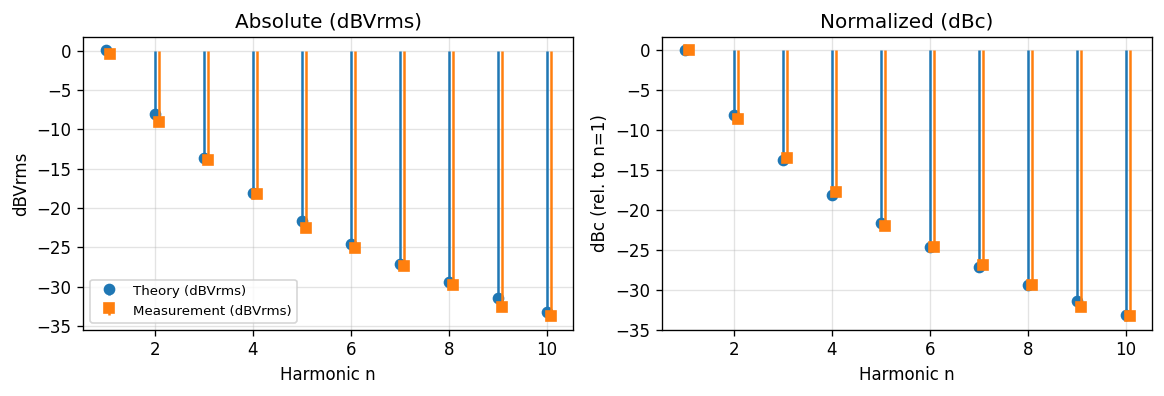

,n,theory_dBVrms,meas_dBVrms,err_dB
0,1,0.04,-0.42,-0.46
1,2,-8.04,-9.06,-1.02
2,3,-13.68,-13.89,-0.20
3,4,-18.06,-18.20,-0.14
4,5,-21.62,-22.48,-0.86
5,6,-24.60,-25.09,-0.49
6,7,-27.16,-27.34,-0.18
7,8,-29.40,-29.84,-0.43
8,9,-31.40,-32.60,-1.20
9,10,-33.19,-33.76,-0.57


,n,theory_dBc,meas_dBc,err_dBc
0,1,0.00,0.00,0.00
1,2,-8.08,-8.64,-0.56
2,3,-13.73,-13.47,0.26
3,4,-18.10,-17.78,0.32
4,5,-21.66,-22.06,-0.40
5,6,-24.64,-24.67,-0.03
6,7,-27.20,-26.92,0.28
7,8,-29.45,-29.42,0.03
8,9,-31.44,-32.18,-0.74
9,10,-33.23,-33.34,-0.11


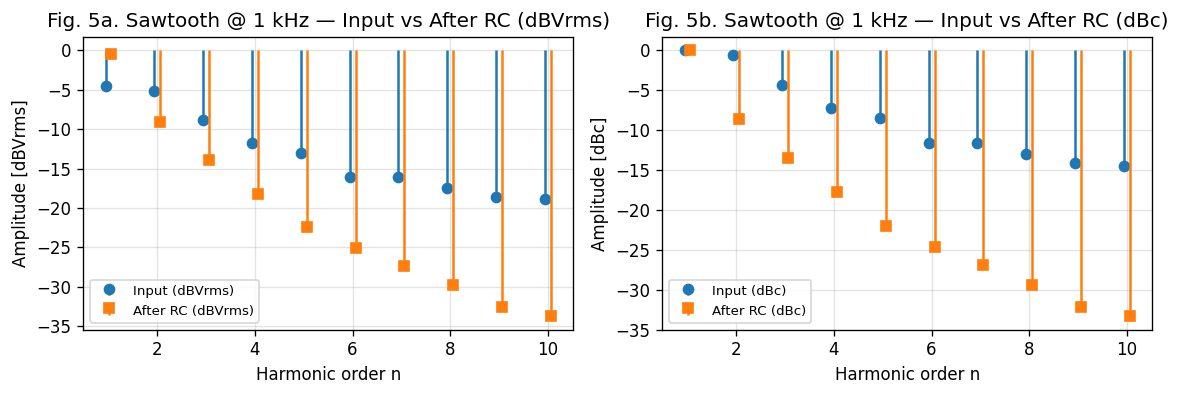

,n,meas_in_dBV,meas_out_dBV,attenuation_dB
0,1,-4.48,-0.42,4.07
1,2,-5.12,-9.06,-3.93
2,3,-8.85,-13.89,-5.04
3,4,-11.71,-18.20,-6.49
4,5,-12.99,-22.48,-9.49
5,6,-16.04,-25.09,-9.05
6,7,-16.07,-27.34,-11.27
7,8,-17.51,-29.84,-12.33
8,9,-18.61,-32.60,-13.99
9,10,-18.93,-33.76,-14.83


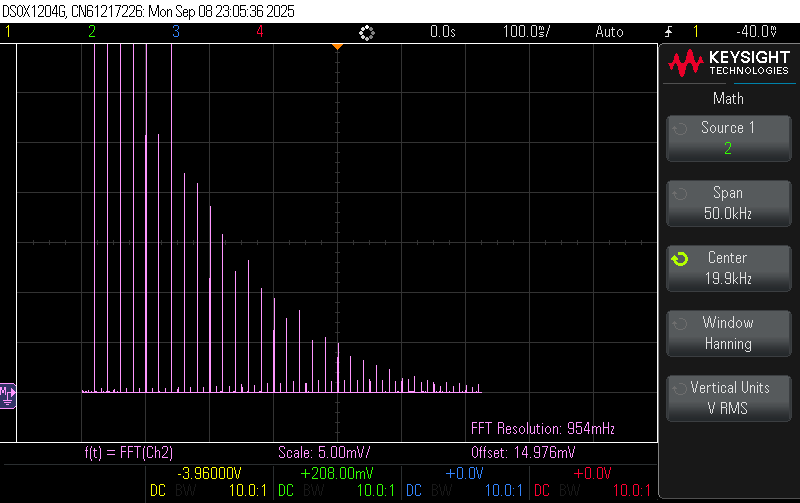

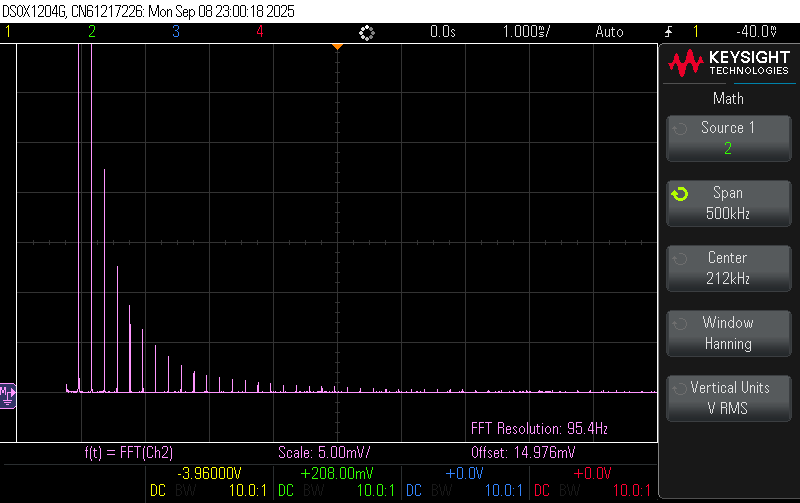

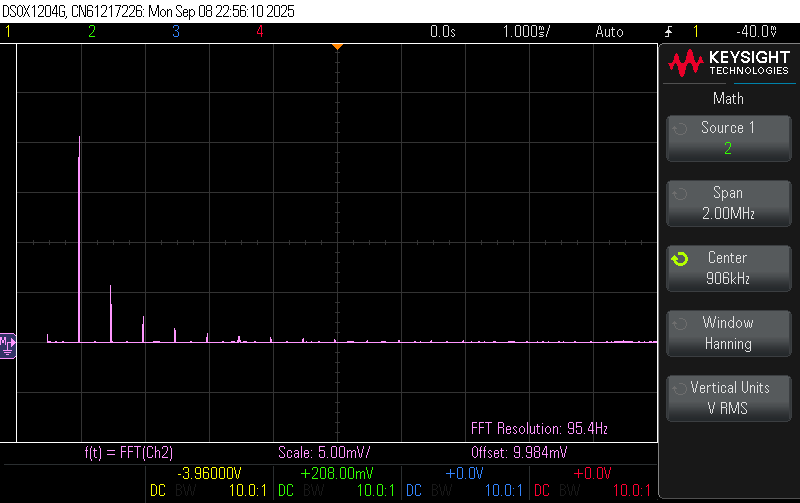

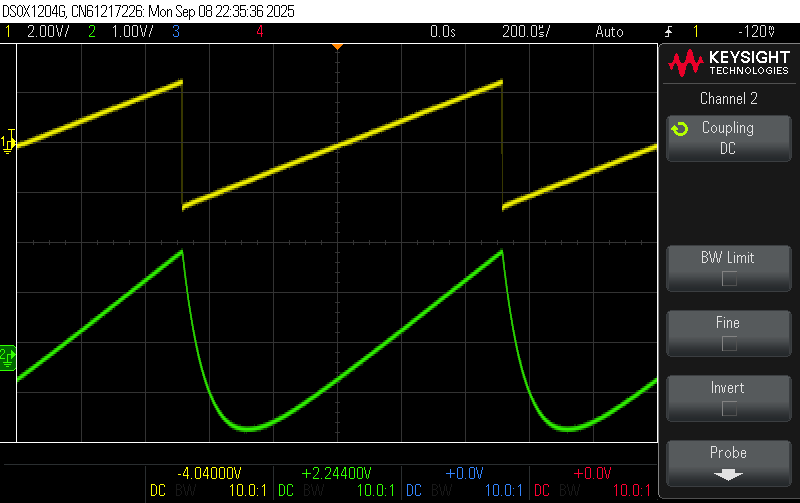

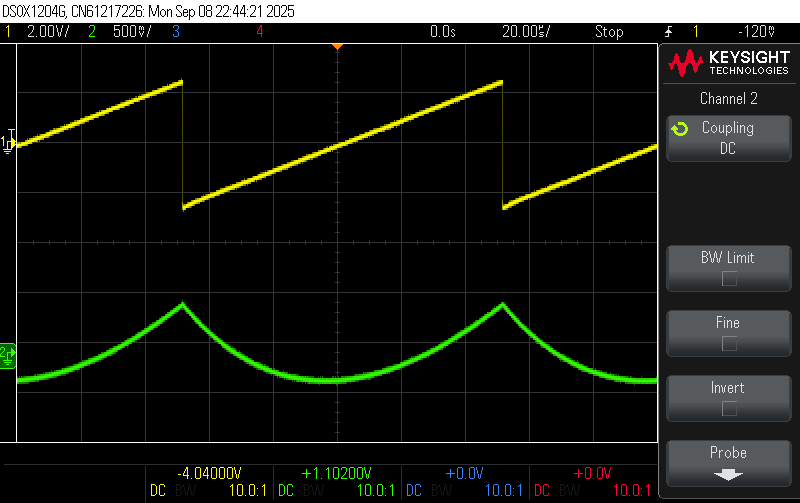

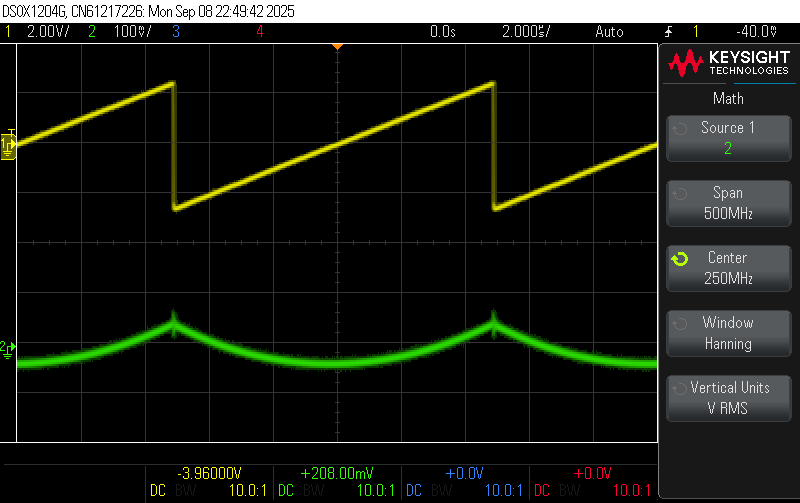

In [219]:

# ===== 4.4 RC unified =====
display(HTML("<div class='pagebreak'></div>"))
display(HTML("<h3>4.4 RC filter (unified)</h3>"))
display(HTML("<div>Two-panel figure (absolute dBVrms and normalized dBc) with tables for the RC output.</div>"))

# 4.4.1 Sawtooth after RC (theory×|H| vs measurement)
df_saw_rc = compare_two_panel("rc_fft_1khz.csv", waveform='saw', apply_rc_to_theory=True, title_prefix="Fig. 4. Sawtooth after RC")
note_theory_vs_meas('saw', apply_rc=True)
show_case_table_abs(
    df_saw_rc,
    "Table 5a. Sawtooth after RC — theory×|H| vs measurement (absolute dBVrms; measured with Keysight oscilloscope FFT)",
    preface_text="Harmonics evaluated at n×1 kHz; theory multiplied by |H(f)|.",
    closing_text="Higher harmonics show stronger attenuation."
)
show_case_table_rel(
    df_saw_rc,
    "Table 5b. Sawtooth after RC — theory×|H| vs measurement (normalized dBc; measured with Keysight oscilloscope FFT)",
    preface_text="Normalization removes absolute level to focus on spectral shape after filtering.",
    closing_text="Spectral roll-off aligns with low-pass behavior."
)

# 4.4.2 Overlay comparison: input vs after RC  (NOW with dBVrms + dBc panels)
spec_in  = read_scope_fft_vrms('trace_saw_fft.csv')   # force Vrms -> dBVrms (Keysight oscilloscope FFT)
spec_out = read_scope_fft_vrms('rc_fft_1khz.csv')     # force Vrms -> dBVrms (Keysight oscilloscope FFT)
meas_in  = pick_harmonics(spec_in,  n_max=N_HARM, col='dBVrms').rename(columns={'dBVrms':'meas_in_dBV'})
meas_out = pick_harmonics(spec_out, n_max=N_HARM, col='dBVrms').rename(columns={'dBVrms':'meas_out_dBV'})
cmp_df = pd.merge(meas_in[['n','meas_in_dBV']], meas_out[['n','meas_out_dBV']], on='n', how='inner')

# Compute dBc for each trace (per-trace normalization to n=1)
cmp_df['in_dBc']  = to_dBc(cmp_df['n'], cmp_df['meas_in_dBV'])
cmp_df['out_dBc'] = to_dBc(cmp_df['n'], cmp_df['meas_out_dBV'])

fig, axes = plt.subplots(1, 2, figsize=(9.8, 3.4))

# Left: Absolute dBVrms overlay
ax = axes[0]
ax.stem(cmp_df['n']-0.06, cmp_df['meas_in_dBV'],  linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Input (dBVrms)')
ax.stem(cmp_df['n']+0.06, cmp_df['meas_out_dBV'], linefmt='C1-', markerfmt='C1s', basefmt=' ', label='After RC (dBVrms)')
ax.set_title('Fig. 5a. Sawtooth @ 1 kHz — Input vs After RC (dBVrms)')
ax.set_xlabel('Harmonic order n'); ax.set_ylabel('Amplitude [dBVrms]')
ax.grid(True, alpha=0.35); ax.legend(fontsize=8)

# Right: Normalized dBc overlay
ax2 = axes[1]
ax2.stem(cmp_df['n']-0.06, cmp_df['in_dBc'],  linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Input (dBc)')
ax2.stem(cmp_df['n']+0.06, cmp_df['out_dBc'], linefmt='C1-', markerfmt='C1s', basefmt=' ', label='After RC (dBc)')
ax2.set_title('Fig. 5b. Sawtooth @ 1 kHz — Input vs After RC (dBc)')
ax2.set_xlabel('Harmonic order n'); ax2.set_ylabel('Amplitude [dBc]')
ax2.grid(True, alpha=0.35); ax2.legend(fontsize=8)

fig.tight_layout()
plt.show()

caption("Figs. 5a–5b. Overlays measured with Keysight oscilloscope FFT; CSV amplitudes were Vrms and converted to dBVrms here.")

# Table 6: attenuation per harmonic (after - input) — absolute dBVrms
cmp_df['attenuation_dB'] = cmp_df['meas_out_dBV'] - cmp_df['meas_in_dBV']
display(HTML("<div style='font-weight:600' class='caption'>Table 6. Sawtooth at 1 kHz — attenuation per harmonic (after − input) [dB]; measured with Keysight oscilloscope FFT</div>"))
display(cmp_df[['n','meas_in_dBV','meas_out_dBV','attenuation_dB']].round(2))
display(HTML("<div class='figure-note'>Attenuation increases with harmonic number, close to −20 dB/dec.</div>"))

# 4.4.3 Frequency response (FFT) — start on new page
display(HTML("<div class='pagebreak'></div>"))
display(HTML("<div class='keep-with-next nobreak'>The following FFT views at 1 kHz, 10 kHz, and 100 kHz show how higher frequencies are attenuated more strongly by the RC filter.</div>"))

IMG_WIDTH = 360
for cap, path in [
    ("Fig. 6. RC near 1 kHz (FFT) — measured with Keysight oscilloscope FFT",   "rc_fft_1khz.png"),
    ("Fig. 7. RC near 10 kHz (FFT) — measured with Keysight oscilloscope FFT",  "rc_fft_10khz.png"),
    ("Fig. 8. RC near 100 kHz (FFT) — measured with Keysight oscilloscope FFT", "rc_fft_100khz.png"),
]:
    try:
        display(Image(filename=path, embed=True, width=IMG_WIDTH))
        caption(cap)
    except Exception as e:
        display(HTML(f"<div style='color:#c00'>Missing image: {path} ({e})</div>"))

# 4.4.4 Time-domain — same treatment
display(HTML("<div class='pagebreak'></div>"))
display(HTML("<div class='keep-with-next nobreak'>Time-domain snapshots of the RC output at 1 kHz, 10 kHz, and 100 kHz confirm that the waveform becomes progressively smoother.</div>"))

for cap, path in [
    ("Fig. 9. 1 kHz time-domain (RC output)",   "rc_signal.png"),
    ("Fig. 10. 10 kHz time-domain (RC output)", "rc_10khz.png"),
    ("Fig. 11. 100 kHz time-domain (RC output)","rc_100khz.png"),
]:
    try:
        display(Image(filename=path, embed=True, width=IMG_WIDTH))
        caption(cap)
    except Exception as e:
        display(HTML(f"<div style='color:#c00'>Missing image: {path} ({e})</div>"))

display(HTML("<div class='figure-note keep-with-next nobreak'>These observations agree with the FFT analysis and confirm the expected low-pass behavior.</div>"))


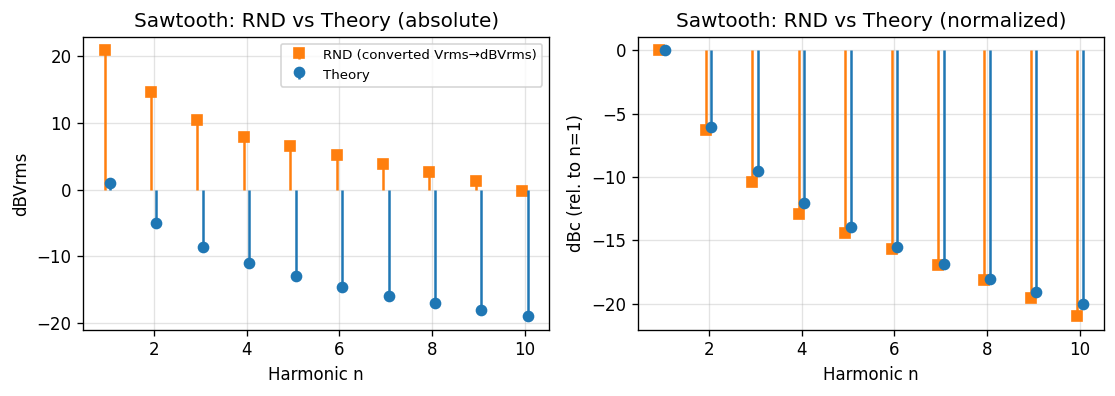

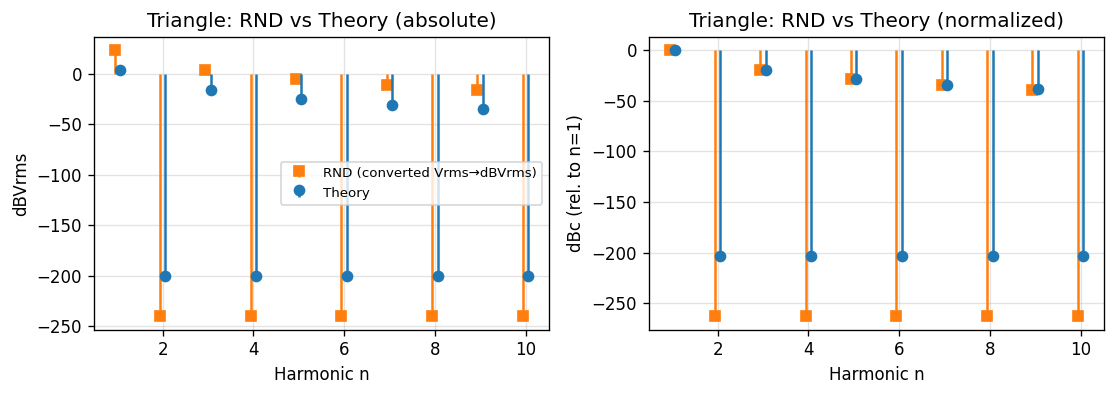

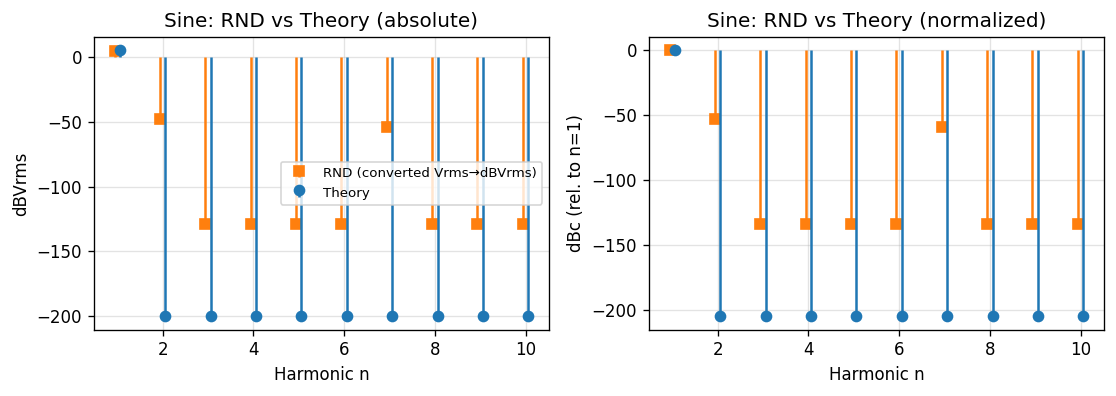

Agreement metrics (exclude n=1):


,Waveform,MAE_abs_dB,Max|Δ|_abs_dB,MAE_rel_dB,Max|Δ|_rel_dB
0,Sawtooth,19.39,19.81,0.48,1.01
1,Triangle,30.76,40.00,33.54,59.86
2,Sine,88.35,151.84,88.76,152.25


In [220]:
# === RND vs THEORY for all signals (saw / tri / sin) ===
# - Left: absolute dBVrms (RND CSVs are Vrms -> converted here)
# - Right: normalized dBc (shape comparison, offset-free)

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path

F0    = 1000.0   # [Hz]
VPP   = 5.0      # Vpp on the scope (change if different)
A     = VPP/2.0  # Vpeak
N_HARM= 10

# ---------- RND CSVs (Vrms; we will convert to dBVrms) ----------
files_rnd = {
    'saw': 'RND_lab_saw_fft.csv',
    'tri': 'RND_lab_triangle_fft.csv',
    'sin': 'RND_lab_sine_1khz_fft.csv',
}

# ---------- Theory Fourier Vrms helpers ----------
def sawtooth_vrms(n, A=A):
    if n <= 0: return 0.0
    return (2*A/(np.pi*n)) / np.sqrt(2)

def triangle_vrms(n, A=A):
    if n <= 0 or n % 2 == 0: return 0.0
    return (8*A/(np.pi**2) / n**2) / np.sqrt(2)

def sine_vrms(n, A=A):
    return (A/np.sqrt(2)) if n == 1 else 0.0

theory_funcs = {"saw": sawtooth_vrms, "tri": triangle_vrms, "sin": sine_vrms}

# ---------- CSV reader: semicolon + decimal-comma; last two numeric fields = freq, Vrms ----------
def read_rnd_vrms_to_dbvrms(csv_path, floor_vrms=1e-12):
    raw = pd.read_csv(Path(csv_path), sep=';', header=None, engine='python', dtype=str, on_bad_lines='skip')
    freqs, vrms_vals = [], []
    for _, row in raw.iterrows():
        nums = []
        for cell in row.dropna():
            s = cell.strip().replace(',', '.')
            try:
                nums.append(float(s))
            except:
                pass
        if len(nums) >= 2:
            f, v = nums[-2], nums[-1]
            if f >= 0:
                freqs.append(f); vrms_vals.append(v)
    if not freqs:
        raise ValueError(f"No FFT data found in {csv_path}")
    df = pd.DataFrame({'freq': freqs, 'Vrms': vrms_vals}).astype({'freq': float, 'Vrms': float})
    df = df.sort_values('freq').drop_duplicates('freq')
    # Vrms -> dBVrms
    vrms = np.maximum(df['Vrms'].values, floor_vrms)
    df['dBVrms'] = 20*np.log10(vrms)
    return df[['freq', 'dBVrms']]

def pick_harmonics(spec_df, f0, n_max):
    f = spec_df['freq'].values; y = spec_df['dBVrms'].values
    n_all = np.arange(1, n_max+1); t = n_all * f0
    ok = (t >= f.min()) & (t <= f.max())
    n = n_all[ok]; t = t[ok]
    idx = np.searchsorted(f, t); idx = np.clip(idx, 1, len(f)-1)
    choose = np.where(np.abs(f[idx]-t) < np.abs(f[idx-1]-t), idx, idx-1)
    return pd.DataFrame({'n': n, 'dBVrms': y[choose]})

def to_dBc(series_dBV, n_series):
    n = np.asarray(n_series); y = np.asarray(series_dBV, float)
    ref = y[n.tolist().index(1)] if 1 in n else np.max(y)
    return y - ref

# ---------- Loop all waveforms ----------
plt.rcParams['figure.dpi'] = 120
stats_rows = []

for wf, title in [('saw','Sawtooth'), ('tri','Triangle'), ('sin','Sine')]:
    # 1) Read RND (Vrms -> convert here)
    rnd_spec = read_rnd_vrms_to_dbvrms(files_rnd[wf])
    rnd_h = pick_harmonics(rnd_spec, F0, N_HARM).rename(columns={'dBVrms':'rnd_dBV'})
    
    # 2) Build THEORY in dBVrms
    f_theo = theory_funcs[wf]
    theo_vrms = [f_theo(n) for n in rnd_h['n']]
    theo_dBV  = [20*np.log10(v) if v>0 else -200.0 for v in theo_vrms]  # floor tiny zeros
    df = rnd_h.copy()
    df['theory_dBV'] = theo_dBV
    
    # 3) Normalize to dBc (n=1)
    df['rnd_dBc']    = to_dBc(df['rnd_dBV'], df['n'])
    df['theory_dBc'] = to_dBc(df['theory_dBV'], df['n'])
    
    # 4) Simple stats (exclude n=1)
    m = df['n'] >= 2
    mae_abs = np.mean(np.abs(df.loc[m,'rnd_dBV'] - df.loc[m,'theory_dBV'])) if m.any() else np.nan
    mae_rel = np.mean(np.abs(df.loc[m,'rnd_dBc'] - df.loc[m,'theory_dBc'])) if m.any() else np.nan
    stats_rows.append([title,
                       mae_abs,
                       np.max(np.abs(df.loc[m,'rnd_dBV'] - df.loc[m,'theory_dBV'])) if m.any() else np.nan,
                       mae_rel,
                       np.max(np.abs(df.loc[m,'rnd_dBc'] - df.loc[m,'theory_dBc'])) if m.any() else np.nan])

    # 5) Plot
    fig, axes = plt.subplots(1, 2, figsize=(9.4, 3.4))
    
    # Absolute dBVrms
    ax = axes[0]
    ax.stem(df['n']-0.06, df['rnd_dBV'],      linefmt='C1-', markerfmt='C1s', basefmt=' ')
    ax.stem(df['n']+0.06, df['theory_dBV'],   linefmt='C0-', markerfmt='C0o', basefmt=' ')
    ax.set_xlabel('Harmonic n'); ax.set_ylabel('dBVrms')
    ax.set_title(f'{title}: RND vs Theory (absolute)')
    ax.legend(['RND (converted Vrms→dBVrms)', 'Theory'], fontsize=8)
    ax.grid(alpha=0.35)
    
    # Relative dBc
    ax2 = axes[1]
    ax2.stem(df['n']-0.06, df['rnd_dBc'],     linefmt='C1-', markerfmt='C1s', basefmt=' ')
    ax2.stem(df['n']+0.06, df['theory_dBc'],  linefmt='C0-', markerfmt='C0o', basefmt=' ')
    ax2.set_xlabel('Harmonic n'); ax2.set_ylabel('dBc (rel. to n=1)')
    ax2.set_title(f'{title}: RND vs Theory (normalized)')
    ax2.grid(alpha=0.35)
    
    fig.tight_layout()
    plt.show()

# ---------- Summary table ----------
stats_df = pd.DataFrame(stats_rows, columns=[
    'Waveform', 'MAE_abs_dB', 'Max|Δ|_abs_dB', 'MAE_rel_dB', 'Max|Δ|_rel_dB'
])
print("Agreement metrics (exclude n=1):")
display(stats_df.round(2))


<div class="pagebreak"></div>

## Discussion

- **Sawtooth vs triangle vs sine (Sections 4.1–4.3):**  
  The measured spectra followed Fourier predictions closely.  
  - Sawtooth: all harmonics present, amplitudes near \(1/n\); higher orders slightly weaker due to bandwidth and FFT limits.  
  - Triangle: only odd harmonics, amplitudes decayed close to \(1/n^2\) but a bit faster than theory, indicating extra high-frequency attenuation.  
  - Sine: only the fundamental remained; higher orders were at the noise floor. Small spurious peaks arose from FFT leakage and quantization.

- **RC filter (Section 4.4):**  
  The RC stage behaved as a first-order low-pass filter.  
  - Measured cutoff ≈ 1.98 kHz matched theory.  
  - Harmonics showed the expected −20 dB/decade roll-off (Figs. 6–8, Table 6).  
  - Time-domain plots (Figs. 9–11) confirmed smoothing of sharp edges as high frequencies were suppressed.  
  - Minor deviations arose from component tolerances, parasitics, Hann window correction, and FFT resolution.  

- **Source comparison (Section 4.5):**  
  Keysight AWG and RND Lab FG gave nearly identical fundamentals.  
  - RND preserved stronger upper harmonics, closer to Fourier theory, thanks to 500 MSa/s, 14-bit resolution, and low distortion [8][9].  
  - Keysight output was smoother, with weaker high-order content and occasional spurious peaks from DAC and filtering.  

**Summary:**  
Theory and measurement agreed within a few dB. Each waveform showed its predicted harmonic pattern, and the RC filter matched the −20 dB/decade model. Generator differences explained remaining deviations. Overall, Fourier series and simple RC theory accurately predicted observed spectral shaping.


<div class="pagebreak"></div>

## Conclusions

We verified theoretical Fourier amplitudes for sawtooth, triangle, and sine waves, as well as the expected first-order RC attenuation. The experiments demonstrated that Fourier analysis provides an accurate framework for predicting both harmonic content and filtering effects.

Key points:
- Harmonic roll-off followed theory: \(1/n\) for sawtooth, \(1/n^2\) for triangle, and only the fundamental for sine.  
- The RC filter suppressed higher harmonics with a slope of ≈ −20 dB/dec, producing progressively smoother waveforms in the time domain.  
- Source comparison (Section 4.5) showed that both Keysight AWG and RND Lab FG produced equivalent fundamentals; the RND preserved stronger upper harmonics due to higher resolution and bandwidth, while the Keysight output appeared smoother because of stronger output filtering.  
- Differences of ≤ a few dB between theory and measurement can be attributed to FFT windowing, finite frequency resolution, generator limitations, and component tolerances.  
- The combined oscilloscope FFT + Python workflow proved effective for quantitative harmonic extraction and comparison.

**Conclusion:**  
Fourier series combined with simple RC filter theory accurately predicts the spectral shaping observed in practice. The lab confirmed that theoretical models remain valid under real-world measurement conditions, with deviations explained by known instrument and component limitations.
<div class="pagebreak"></div>


## References

[1] H. Hallenberg, Signalbehandling och kommunikationssystem, Yrgo, 2021.  
[2] ELA24 – Laboration: Frekvensanalys (Lab PM).  
[3] ELA24 – Ledning Fourierlabben.  
[4] Keysight Oscilloscope User Guide (FFT in dBVrms).  
[5] Wikipedia, “Low‑pass filter – RC filter.”  
[6] Keysight Technologies, 1000‑X Series Oscilloscope User Guide (FFT scaling, window functions).  
[7] Keysight Technologies, BenchVue Software (BV0000A) User Guide, 2019.  
[8] RND Lab Function Generator Datasheet, RND_360-00002_eng_tds.pdf.  
[9] RND Lab Function Generator Quick Guide, RND_360-00002_Quick_Guide_eng_man.pdf.  
<div class="pagebreak"></div>

## Appendix A: Figures

Appendix A contains oscilloscope screenshots of input and RC‑filtered signals.

### Time-domain waveforms (Input signals)

<div class="keep-together" style="display:flex; flex-wrap:wrap; gap:16px; align-items:flex-start; margin:0.3em 0 1.2em 0;">
  <div style="flex:1 1 30%"><div class="caption" style="margin:0.35em 0">Fig. A1. Sawtooth input (time domain)</div><img src="saw_signal.png" alt="Fig. A1. Sawtooth input" width="320"/></div>
  <div style="flex:1 1 30%"><div class="caption" style="margin:0.35em 0">Fig. A2. Triangle input (time domain)</div><img src="triangle_signal.png" alt="Fig. A2. Triangle input" width="320"/></div>
  <div style="flex:1 1 30%"><div class="caption" style="margin:0.35em 0">Fig. A3. Sine input (time domain)</div><img src="sine_signal.png" alt="Fig. A3. Sine input" width="320"/></div>
</div>

### FFT spectra (Measured)

<div class="keep-together" style="display:flex; flex-wrap:wrap; gap:16px; align-items:flex-start; margin:0.3em 0 1.2em 0;">
  <div style="flex:1 1 30%"><div class="caption" style="margin:0.35em 0">Fig. A4. Sawtooth input (FFT)</div><img src="saw_fft.png" alt="Fig. A4. Sawtooth FFT" width="320"/></div>
  <div style="flex:1 1 30%"><div class="caption" style="margin:0.35em 0">Fig. A5. Triangle input (FFT)</div><img src="triangle_fft.png" alt="Fig. A5. Triangle FFT" width="320"/></div>
  <div style="flex:1 1 30%"><div class="caption" style="margin:0.35em 0">Fig. A6. Sine input (FFT)</div><img src="sine_fft.png" alt="Fig. A6. Sine FFT" width="320"/></div>
</div>

> Note: If an image fails to render in exported PDF, ensure the files are alongside the notebook, or rely on embedded display outputs in the main RC section.
<div class="pagebreak"></div>

## Appendix B: Python math used

The minimal Python used to compute theoretical quantities referenced in the Results is included below for completeness.

```python
# Core helpers (theory + CSV parsing + plotting) moved here for completeness
# ---- Parameters (match main analysis) ----
F0      = 1000.0          # [Hz] fundamental
VPP     = 5.0             # [Vpp] generator-level for theory
A       = VPP/2.0         # [Vpeak]
N_HARM  = 10              # compare first N harmonics
R_meas, C_meas = 8140.0, 9.853e-9
FC      = 1.0/(2*np.pi*R_meas*C_meas)

def vrms_to_dBVrms(vrms, floor=1e-12):
    v = np.maximum(np.asarray(vrms, float), floor)
    return 20.0*np.log10(v)


def rc_mag(f, fc=FC):
    f = np.asarray(f, float)
    return 1.0/np.sqrt(1.0 + (f/fc)**2)


def sawtooth_dBVrms(n, A=A):
    n = np.asarray(n, int)
    vpk = 2.0*A/(np.pi*np.maximum(n,1))
    vrms = vpk/np.sqrt(2.0)
    return vrms_to_dBVrms(vrms)


def triangle_dBVrms(n, A=A):
    n = np.asarray(n, int)
    vrms = np.zeros_like(n, float)
    odd = (n % 2 == 1)
    vpk_odd = 8.0*A/(np.pi**2 * np.maximum(n[odd],1)**2)
    vrms[odd] = vpk_odd/np.sqrt(2.0)
    dB = vrms_to_dBVrms(vrms)
    dB[~odd] = np.nan
    return dB


def sine_dBVrms(n, A=A):
    n = np.asarray(n, int)
    vrms = np.zeros_like(n, float)
    vrms[n == 1] = A/np.sqrt(2.0)
    dB = vrms_to_dBVrms(vrms)
    dB[n != 1] = np.nan
    return dB
```